In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Uncomment the next line for use in a Jupyter notebook
%matplotlib inline
import numpy as np
import cv2

image = mpimg.imread('sample.jpg')

In [3]:
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    ###### TODO:
    # Create an empty array the same size in x and y as the image 
    # but just a single channel
    color_select = np.zeros_like(img[:,:,0])
    # Apply the thresholds for RGB and assign 1's 
    # where threshold was exceeded
    # Return the single-channel binary image
    thresh = (img[:,:,0] > rgb_thresh[0]) & (img[:,:,1] > rgb_thresh[1]) & (img[:,:,2] > rgb_thresh[2])
    color_select[thresh] = 1
    return color_select
    

In [16]:
def perspect_transform(img):
    dst_size = 5
    bottom_offset = 6
    source = np.float32([[15,140],[119,96],[200,97],[302,140]])
    destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                         [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                         [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                         [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset]
                         ])
    #get transform matrix using cv2.getPerspectiveTransform()
    M = cv2.getPerspectiveTransform(source, destination)
    #warp image using cv2.warpPerspective()
    #keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    #return the result
    return warped

warped = perspect_transform(image)

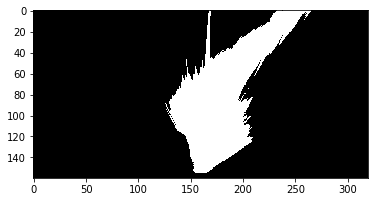

In [17]:
# Assume you have already defined perspect_transform() and color_thresh()
warped = perspect_transform(image)
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))

# Plot the result
plt.imshow(colorsel, cmap='gray')
plt.show()

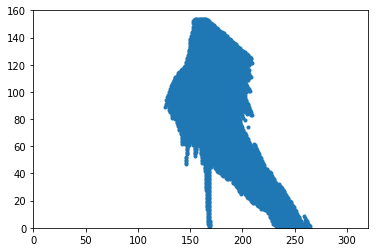

In [28]:
ypos, xpos = colorsel.nonzero()
plt.plot(xpos, ypos, '.')
plt.xlim(0, 320)
plt.ylim(0, 160)
plt.show()

In [30]:
def rover_coords(binary_img):
    # Extract xpos and ypos pixel positions from binary_img and
    # Convert xpos and ypos to rover-centric coordinates
    ypos, xpos = binary_img.nonzero()
    
    x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)

    return x_pixel, y_pixel

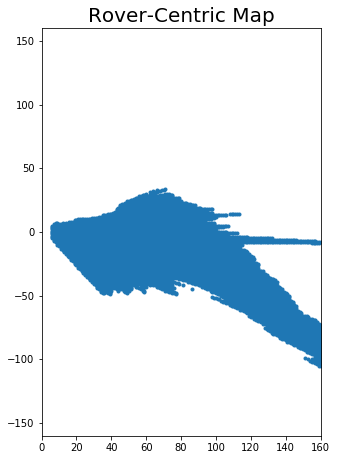

In [31]:
# Perform warping and color thresholding
warped = perspect_transform(image)
colorsel = color_thresh(warped, rgb_thresh=(160, 160, 160))
# Extract x and y positions of navigable terrain pixels
# and convert to rover coordinates
xpix, ypix = rover_coords(colorsel)

# Plot the map in rover-centric coords
fig = plt.figure(figsize=(5, 7.5))
plt.plot(xpix, ypix, '.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
plt.title('Rover-Centric Map', fontsize=20)